# Linear Regression 

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data 

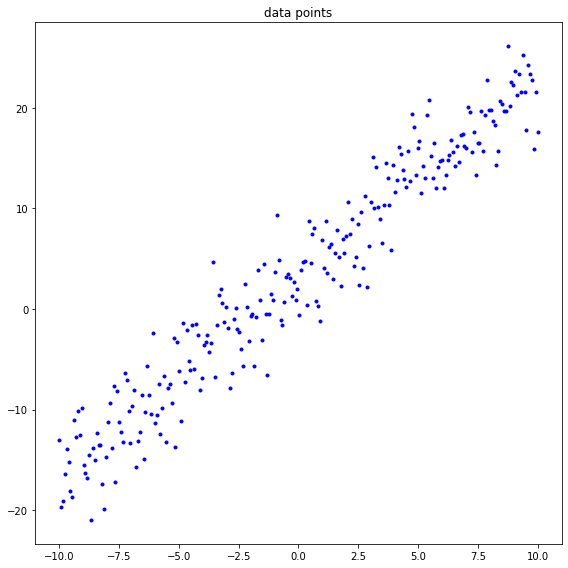

In [2]:
filename    = 'assignment_06_data.csv'
data_load   = np.loadtxt(filename, delimiter = ',')

x   = data_load[0, :]
y   = data_load[1, :]

plt.figure(figsize=(8,8))

plt.plot(x, y, '.', color = 'blue')
plt.title('data points')

plt.tight_layout()
plt.show()

## compute the loss function

In [4]:

def compute_loss(x, y, theta0, theta1):
    f_hat=theta0+x*theta1
    error=y-f_hat
    loss=np.sum(error**2)
    len_x=x.shape[0]
    return loss/(2*len_x)


## compute the gradient for each model parameter

In [5]:
def compute_gradient_theta0(x, y, theta0, theta1):
    f_hat=theta0+x*theta1
    error=f_hat-y
    len_x=x.shape[0]
    dL=(np.sum(error))/(len_x)
    return dL

In [6]:
def compute_gradient_theta1(x, y, theta0, theta1):
    f_hat=theta0+x*theta1
    error=f_hat-y
    len_x=x.shape[0]
    dL=(np.sum(error*x))/(len_x)
    return dL

## gradient descent for each model parameter

In [7]:
num_iteration       = 1000
learning_rate       = 0.01

theta0              = 0
theta1              = 0

theta0_iteration    = np.zeros(num_iteration)
theta1_iteration    = np.zeros(num_iteration)
loss_iteration      = np.zeros(num_iteration)

for i in range(num_iteration):
    theta0  = theta0-learning_rate*compute_gradient_theta0(x,y,theta0,theta1)
    theta1  = theta1-learning_rate*compute_gradient_theta1(x,y,theta0,theta1)
    loss    = compute_loss(x,y,theta0,theta1)

    theta0_iteration[i] = theta0
    theta1_iteration[i] = theta1
    loss_iteration[i]   = loss

    print("iteration = %4d, loss = %5.5f" % (i, loss))

2
iteration =  394, loss = 4.53588
iteration =  395, loss = 4.53585
iteration =  396, loss = 4.53581
iteration =  397, loss = 4.53577
iteration =  398, loss = 4.53574
iteration =  399, loss = 4.53570
iteration =  400, loss = 4.53567
iteration =  401, loss = 4.53564
iteration =  402, loss = 4.53561
iteration =  403, loss = 4.53557
iteration =  404, loss = 4.53554
iteration =  405, loss = 4.53551
iteration =  406, loss = 4.53548
iteration =  407, loss = 4.53545
iteration =  408, loss = 4.53543
iteration =  409, loss = 4.53540
iteration =  410, loss = 4.53537
iteration =  411, loss = 4.53534
iteration =  412, loss = 4.53532
iteration =  413, loss = 4.53529
iteration =  414, loss = 4.53527
iteration =  415, loss = 4.53524
iteration =  416, loss = 4.53522
iteration =  417, loss = 4.53519
iteration =  418, loss = 4.53517
iteration =  419, loss = 4.53515
iteration =  420, loss = 4.53512
iteration =  421, loss = 4.53510
iteration =  422, loss = 4.53508
iteration =  423, loss = 4.53506
iteratio

In [8]:
print(x.shape[0])
f = theta0+theta1*x
print(loss_iteration.shape)

256
(1000,)


## plot the results

In [9]:
print(x.shape[0])
def plot_data_regression(x, y, f):
    
    plt.figure(figsize=(8,6))
    plt.title('linear regression result')
    plt.plot(x,y,'bo',x,f,'r-')
    
    plt.tight_layout()
    plt.show()

256


In [10]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss curve')
    
    plt.xlabel('num of iteration')
    plt.ylabel('loss')
    plt.plot(range(len(loss_iteration)),loss_iteration,'r-')
    
    
    plt.tight_layout()
    plt.show()

In [11]:

def plot_model_parameter(theta0_iteration, theta1_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    
    plt.xlabel('num of iteration')
    
    plt.plot(range(len(theta0_iteration)), theta0_iteration,'b-', range(len(theta1_iteration)),theta1_iteration,'g-')

    plt.tight_layout()
    plt.show()

In [12]:
X0  = np.arange(-10, 10, 0.1)
X1  = np.arange(-10, 10, 0.1)

grid_theta0, grid_theta1 = np.meshgrid(X0,X1)
grid_loss=np.zeros((len(grid_theta0),len(grid_theta1)))
for i in range(len(grid_theta1)):
    for j in range(len(grid_theta0)):
        grid_loss[j,i]=compute_loss(x,y,grid_theta0[0][j],grid_theta1[i][0])

def plot_loss_surface(grid_theta0, grid_theta1, grid_loss):
    
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(projection='3d')
    plt.title('model parameter')
    
    ax.plot_surface(grid_theta0,grid_theta1,grid_loss,)
    
    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point and the regression result in red curve

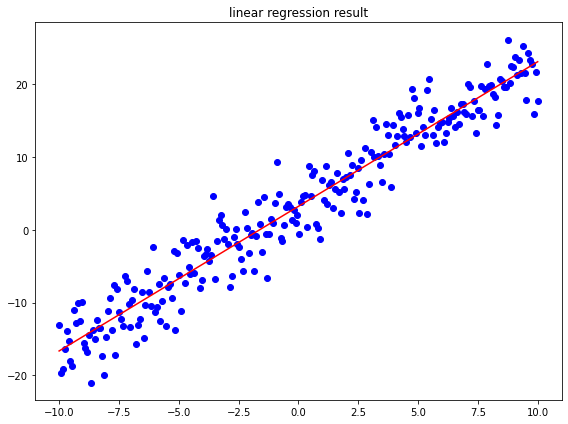

In [13]:
plot_data_regression(x, y, f)

### # 02. plot the values of the model parameters $\theta_0$ in blue curve and $\theta_1$ in green curve over the gradient descent iterations

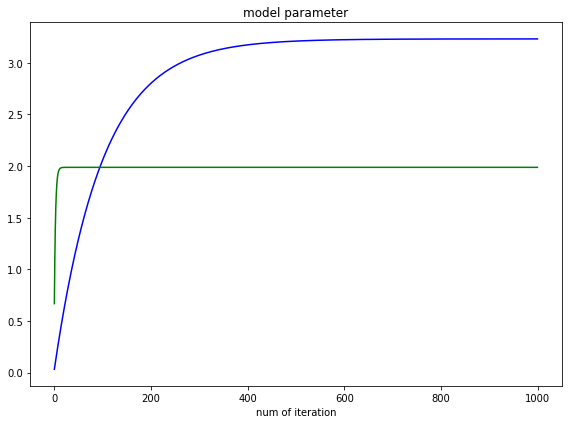

In [14]:
plot_model_parameter(theta0_iteration, theta1_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

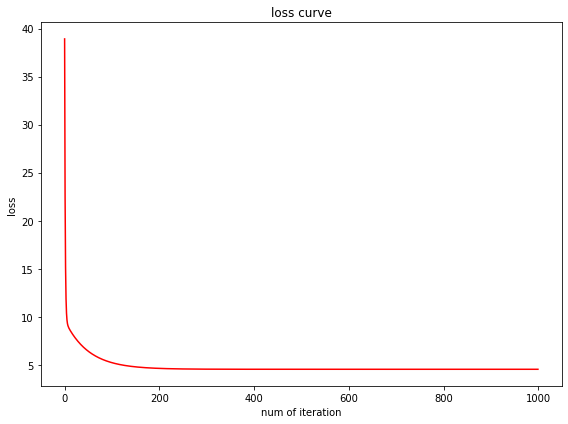

In [15]:
plot_loss_curve(loss_iteration)

### # 04. plot the loss surface in 3-dimension surface where $x$-axis represents $\theta_0$, $y$-axis represents $\theta_1$ and $z$-axis represents $\mathcal{L}$

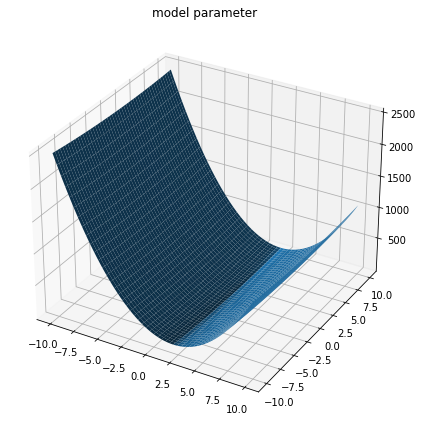

In [16]:
plot_loss_surface(grid_theta0, grid_theta1, grid_loss)